用到的文件，github好像传不了大于25m的，所以只能这样交了
https://send.cra.moe/file/8zmIBolvcjWA2uaw/E1Zhcxe2lkeG27ni/200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc
https://send.cra.moe/file/8zmIBolvcjWA2uaw/ZAqS0v8YjxjLl0Ip/CMSFluxFossilFuelPrior201001_202212_v3.nc
https://send.cra.moe/file/8zmIBolvcjWA2uaw/hsGGtgbdr0KvlM6c/NOAA_NCDC_ERSST_v3b_SST.nc

In [148]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from netCDF4 import num2date
import seaborn as sns
import cftime
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

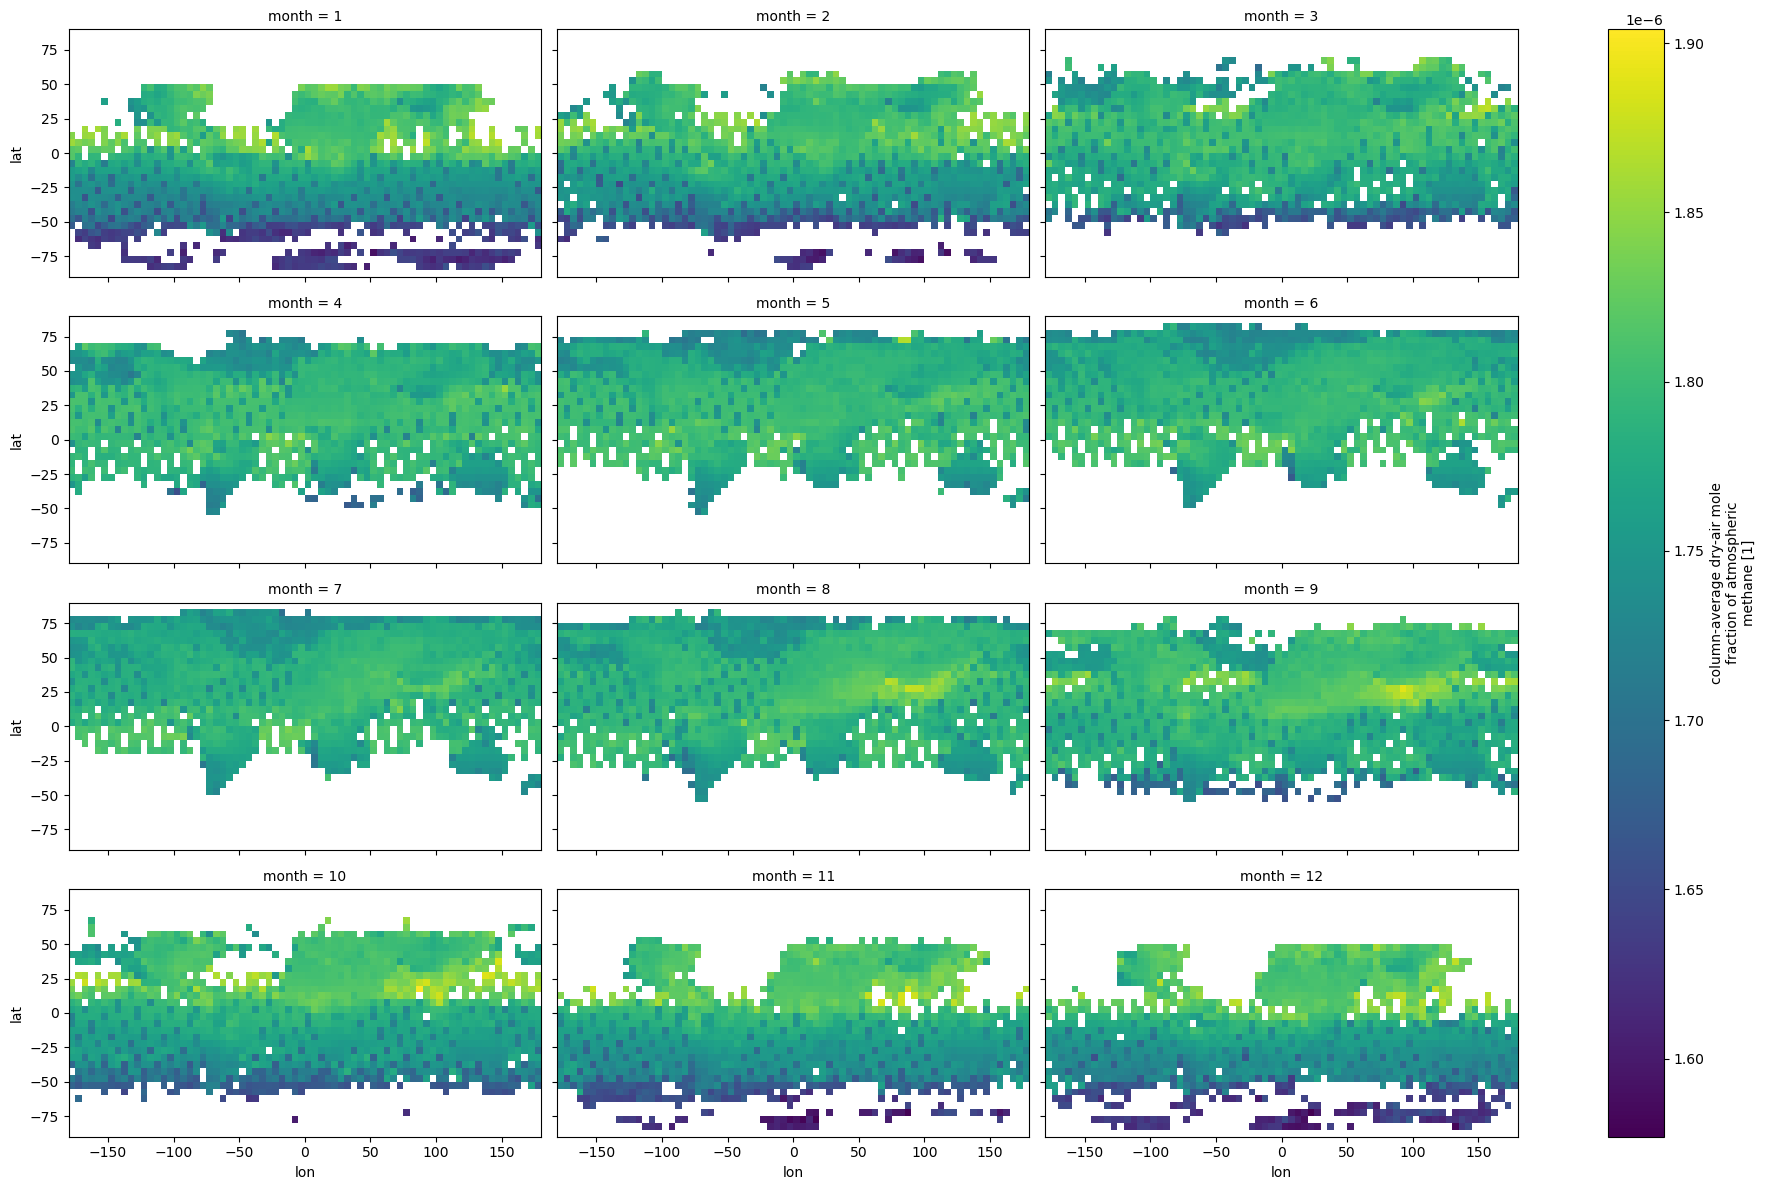

In [447]:
#1.1 Methane climatology
# Open a netCDF4 file
CH4_Origin = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
# Show dataset
#CH4_Origin
# Show dataset info
#CH4_Origin.info()
#按月分组，计算平均值
CH4_clim = CH4_Origin['xch4'].groupby(CH4_Origin.time.dt.month).mean()
#画图
CH4_clim.plot(col='month', col_wrap=3, aspect=2)
plt.show()

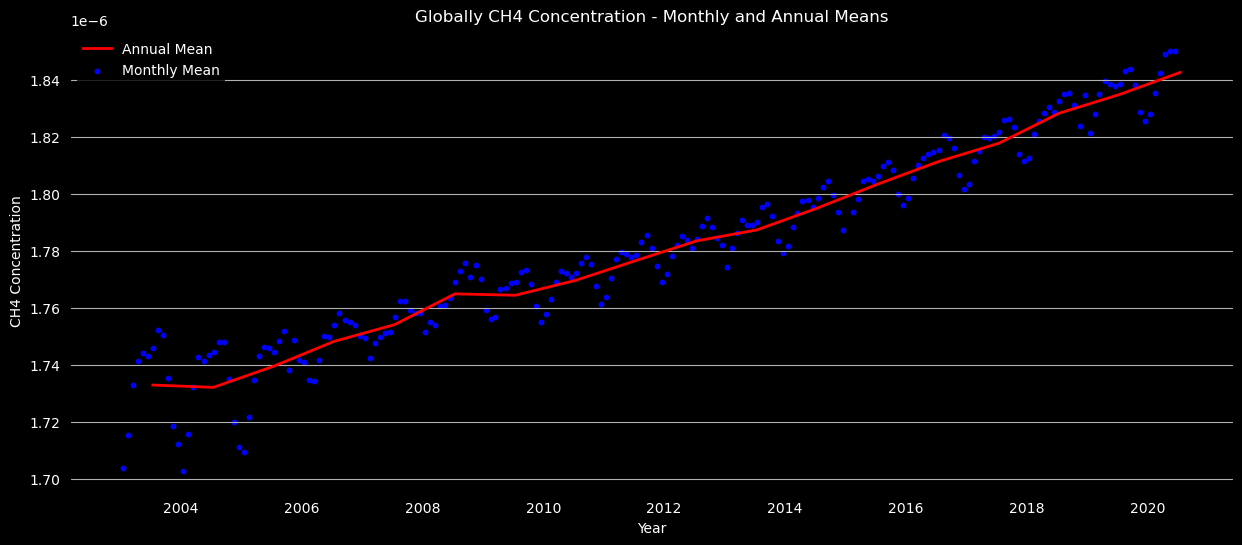

In [451]:
#1.2 Globally-averaged methane
#计算全球的月平均值
CH4_global = CH4_Origin['xch4'].mean(dim=['lat', 'lon'])
# 计算年平均值
CH4_global_annual = CH4_global.groupby(CH4_Origin.time.dt.year).mean()

# 转换时间
CH4_global_annual_df = CH4_global_annual.to_dataframe().reset_index()
CH4_global_annual_df['time'] = pd.to_datetime(CH4_global_annual_df['year'].astype(str) + '-07-15')
#print(CH4_global_annual_df.head())

# 创建图形
fig, ax1 = plt.subplots(figsize=(15, 6),facecolor='black')
ax1.set_facecolor('black')

# 年平均值的折线图
ax1.plot(CH4_global_annual_df['time'], CH4_global_annual_df['xch4'], color='red', label='Annual Mean', linewidth=2)
# 月平均值的散点图
ax1.scatter(CH4_global['time'], CH4_global.values, color='blue', label='Monthly Mean', s=10)

# 设置x轴和y轴的标签
ax1.set_xlabel('Year', color='white')
ax1.set_ylabel('CH4 Concentration', color='white')
ax1.tick_params( labelcolor='white')

# 图例
ax1.legend(loc='upper left', facecolor='black')
legend = ax1.legend(loc='upper left', facecolor='black')
for text in legend.get_texts():
    text.set_color('white')
legend.get_frame().set_edgecolor('none')

# 标题、网格
plt.title('Globally CH4 Concentration - Monthly and Annual Means',color='white')
ax1.grid(which='major', axis='y')
plt.show()

看月平均值可以发现明显的季节差异，在同一年里面呈现出先上升后下降的趋势。
同时还能发现整体上呈现出上升的趋势，因此取了年平均值来放大它的上升趋势

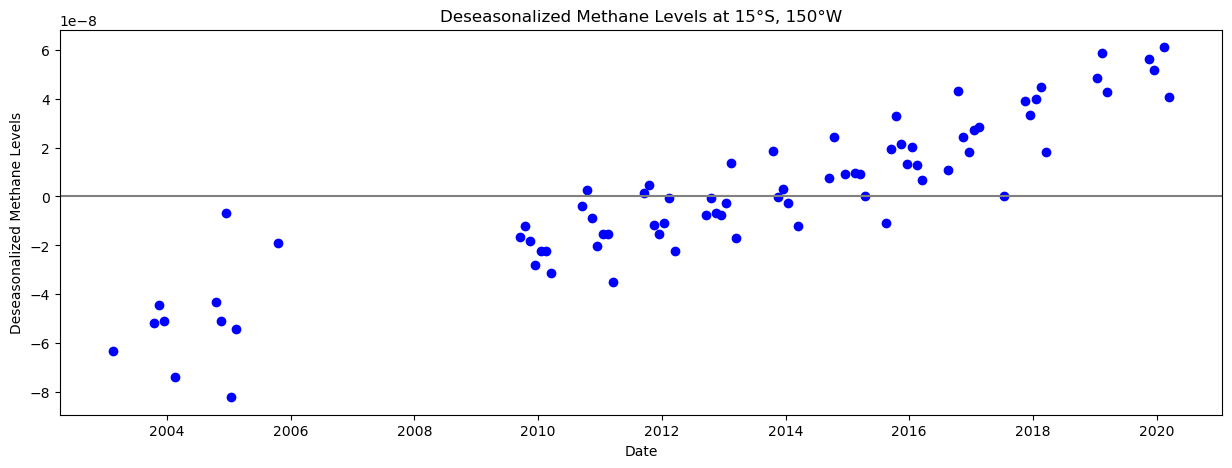

In [445]:
#1.3 Deseasonalized methane levels at certain point
#取点，取值
CH4_plot_origin = CH4_Origin['xch4'].sel(lon=-150, lat=-15, method='nearest')
#CH4_plot_origin.plot(marker="o", size=10)
#CH4_plot_origin

#算月份平均
CH4_plot_clim = CH4_plot_origin.groupby(CH4_plot_origin.time.dt.month).mean()
#CH4_plot_clim.plot(marker="o", size=10)

#转换成df,方便合并算差值
DATE = CH4_plot_origin.time.values
XCH4 = CH4_plot_origin.values
CH4_plot_origin_df = pd.DataFrame({'DATE': DATE,'XCH4': XCH4})
CH4_plot_origin_df['MON'] = CH4_plot_origin_df['DATE'].dt.month
#print(CH4_plot_origin_df)

#转换成df,方便合并算差值
mon = CH4_plot_clim.month.values
xch4 = CH4_plot_clim.values
CH4_plot_clim_df = pd.DataFrame({'MON': mon,'xch4': xch4})
#print(CH4_plot_clim_df)

#合并表格算差值，修改索引方便作图
CH4_plot_merged = pd.merge(CH4_plot_origin_df, CH4_plot_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(CH4_plot_merged)
CH4_plot_merged['XCH4_diff'] = CH4_plot_merged['XCH4'] - CH4_plot_merged['xch4']
#print(CH4_plot_merged)
CH4_plot_time_index = CH4_plot_merged.set_index('DATE')

#创建图形
plt.figure(figsize=(15, 5))
#散点
plt.scatter(CH4_plot_merged['DATE'], CH4_plot_merged['XCH4_diff'], marker="o", color="b")
#标题、图例、参考线
plt.title('Deseasonalized Methane Levels at 15°S, 150°W')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Methane Levels')
plt.axhline(y=0, color='grey')
plt.show()

中间有一段缺失值，同时呈现出明显的上升趋势

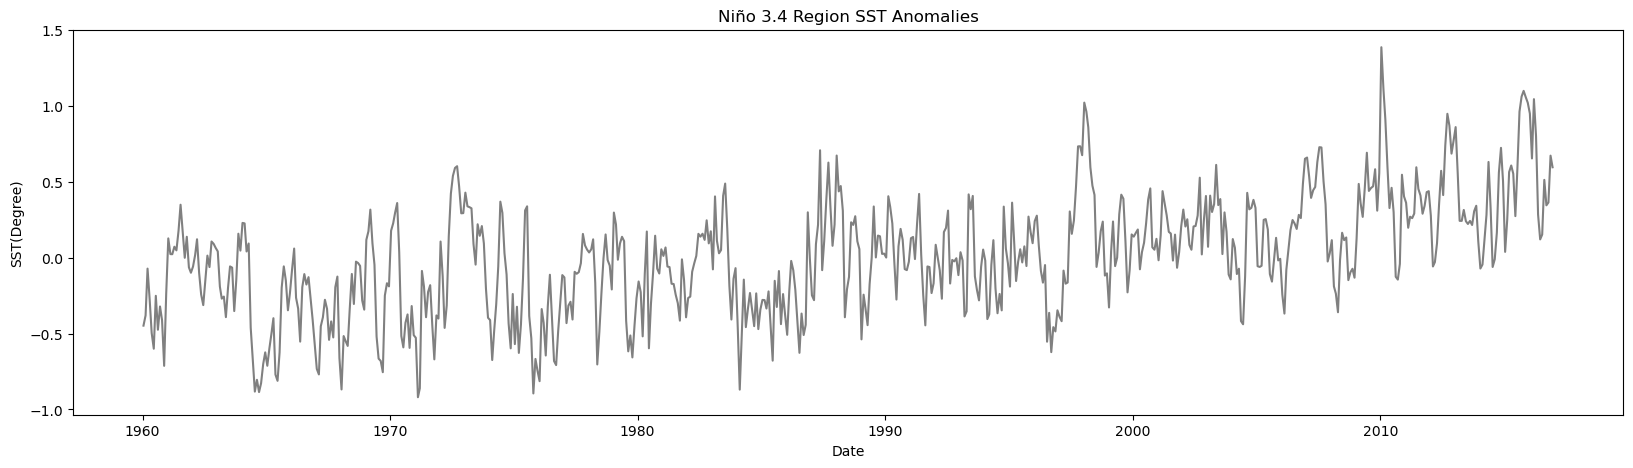

In [461]:
#2.1 Anomalies SST From Niño 3.4 Region
# Open a netCDF4 file
SST_Origin = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# Show dataset
#SST_Origin
# Show dataset info
#SST_Origin.info()

#划区域，算区域平均
SST_NINO_Origin = SST_Origin['sst'].sel(lon=slice(10, 60),lat=slice(-5, 5))
SST_NINO_avg_time = SST_NINO_Origin.mean(dim=['lat', 'lon'])
#SST_NINO_avg_time

#算时间平均
SST_NINO_clim = SST_NINO_avg_time.groupby(SST_NINO_avg_time.time.dt.month).mean()
#SST_NINO_clim
#SST_NINO_clim.plot()

#转换成df,方便合并算差值
DATE = SST_NINO_avg_time.time.values
SST = SST_NINO_avg_time.values
SST_NINO_avg_time_df = pd.DataFrame({'DATE': DATE,'SST': SST})
SST_NINO_avg_time_df['MON'] = SST_NINO_avg_time_df['DATE'].dt.month
#print(SST_NINO_avg_time_df)

#转换成df,方便合并算差值
mon = SST_NINO_clim.month.values
sst = SST_NINO_clim.values
SST_NINO_clim_df = pd.DataFrame({'MON': mon,'SST_clim': sst})
#print(SST_NINO_clim_df)

#合并表格算差值
SST_NINO_merged = pd.merge(SST_NINO_avg_time_df, SST_NINO_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(SST_NINO_merged)
SST_NINO_merged['SST_diff'] = SST_NINO_merged['SST'] - SST_NINO_merged['SST_clim']
#print(SST_NINO_merged)

#作图，这里要的是异常值的图，所以没算滑动平均
plt.figure(figsize=(20, 5))
plt.plot(SST_NINO_merged['DATE'], SST_NINO_merged['SST_diff'], linestyle="-", color="grey")
plt.xlabel('Date')
plt.ylabel('SST(Degree)')
plt.title('Niño 3.4 Region SST Anomalies')
plt.show()

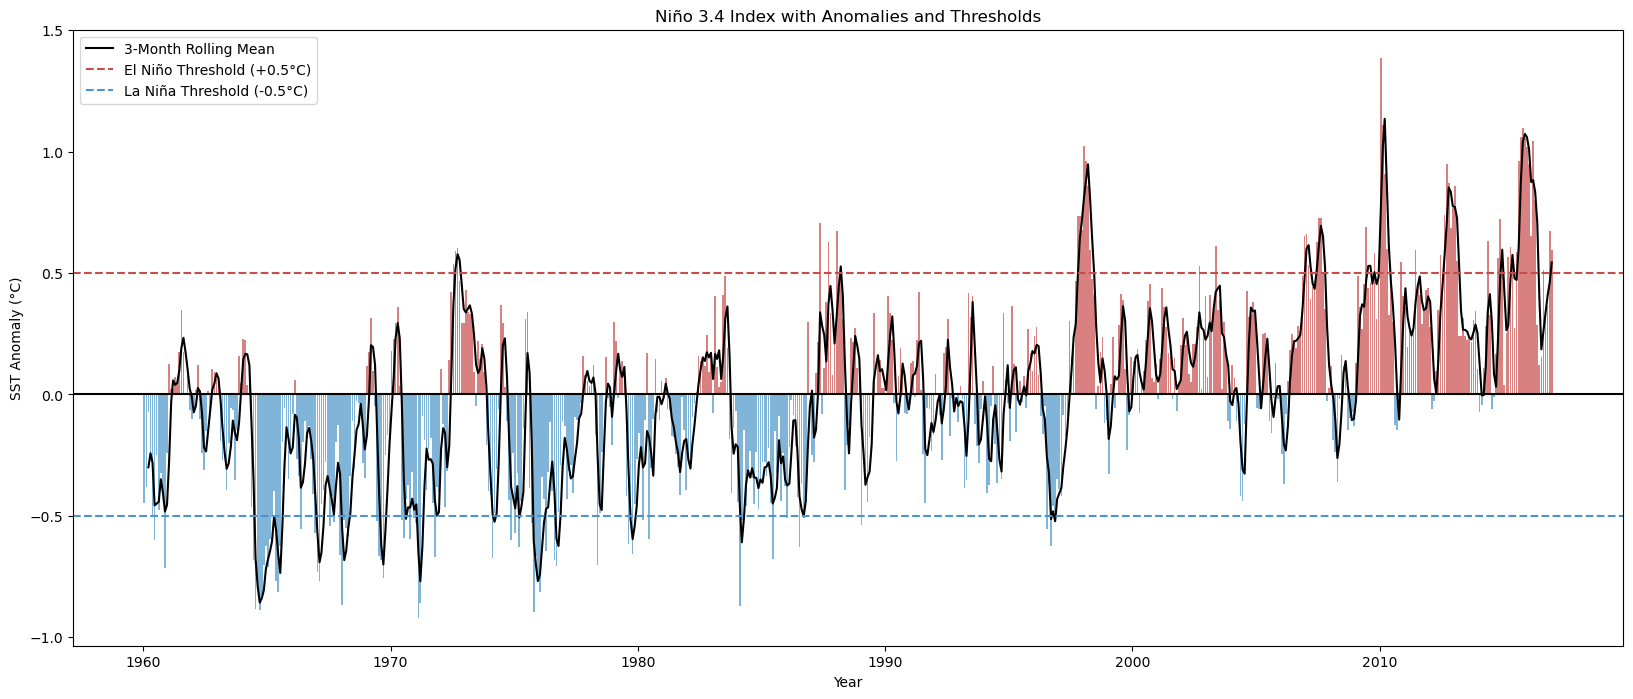

In [498]:
#2.2 Visualize the computed Niño 3.4.
#计算滑动平均值
SST_NINO_merged['SST_diff_rolling'] = SST_NINO_merged['SST_diff'].rolling(window=3).mean()

#创建图形
plt.figure(figsize=(20, 8))
#柱状图表示非滑动平均的值，大于0的红色，小于0的蓝色
plt.bar(SST_NINO_merged['DATE'], SST_NINO_merged['SST_diff'], 
        color=['#c94c4c' if val > 0 else '#4c94c9' 
               for val in SST_NINO_merged['SST_diff']],
        alpha=0.7, width=25)
#折线图表示滑动平均后的值
plt.plot(SST_NINO_merged['DATE'], SST_NINO_merged['SST_diff_rolling'],
         color='black', label='3-Month Rolling Mean', linewidth=1.5)
#加参考线表示阈值
plt.axhline(y=0, color='black')
plt.axhline(y=0.5, color='#c94c4c', linestyle='--', label='El Niño Threshold (+0.5°C)')
plt.axhline(y=-0.5, color='#4c94c9', linestyle='--', label='La Niña Threshold (-0.5°C)')
#图例、坐标轴
plt.legend()
plt.title('Niño 3.4 Index with Anomalies and Thresholds')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (°C)')
plt.show()

3 Explore a netCDF dataset
这个数据来源是https://disc.gsfc.nasa.gov/datasets/CMSFluxFossilFuelPrior_3/summary
描述的是化石燃料碳通量

In [154]:
#3.1 Plot a time series of a certain variable
# Open a netCDF4 file
FUEL_Origin = xr.open_dataset("CMSFluxFossilFuelPrior201001_202212_v3.nc", engine="netcdf4", decode_times=False)
#引入文件的时候时间读不了，要重新赋值
time_var = FUEL_Origin['time']
time_dates = num2date(time_var.values, units='months since 2010-01-15', calendar='360_day')
time_pandas = pd.to_datetime([d.strftime('%Y-%m-%d %H:%M:%S') for d in time_dates])
FUEL_Origin['time'] = time_pandas
print("Data type of 'time' variable after conversion:", FUEL_Origin['time'].dtype)
# Show dataset
FUEL_Origin
# Show dataset info
#FUEL_Origin.info()

Data type of 'time' variable after conversion: datetime64[ns]


<xarray.Dataset>
Dimensions:    (time: 156, latitude: 180, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 2010-01-15 2010-02-15 ... 2022-12-15
Data variables:
    fossil     (time, latitude, longitude) float32 ...
    area       (latitude, longitude) float32 ...
Attributes: (12/22)
    title:                          Carbon Monitoring System Carbon Flux for ...
    ShortName:                      CMSFluxFossilFuelPrior
    LongName:                       Carbon Monitoring System Carbon Flux for ...
    Comment:                        The prior fossil fuel emissions used in C...
    GranuleID:                      CMSFluxFossilFuelPrior201001_202212_v3.nc
    IdentifierProductDOI:           10.5067/Y7QUDGMD2HUG
    ...                             ...
    VersionID:                      3
    date_created:                   2023-08-18
    institution:                    Jet Propulsion Laboratory, California Ins...
    reference:                      Liu et al.,Carbon Monitoring System Flux ...
    DataSetQuality:                 Friedlingstein, P., et al., Global Carbon...
    ContactPersonName:              Junjie Liu (Junjie.Liu@jpl.nasa.gov)

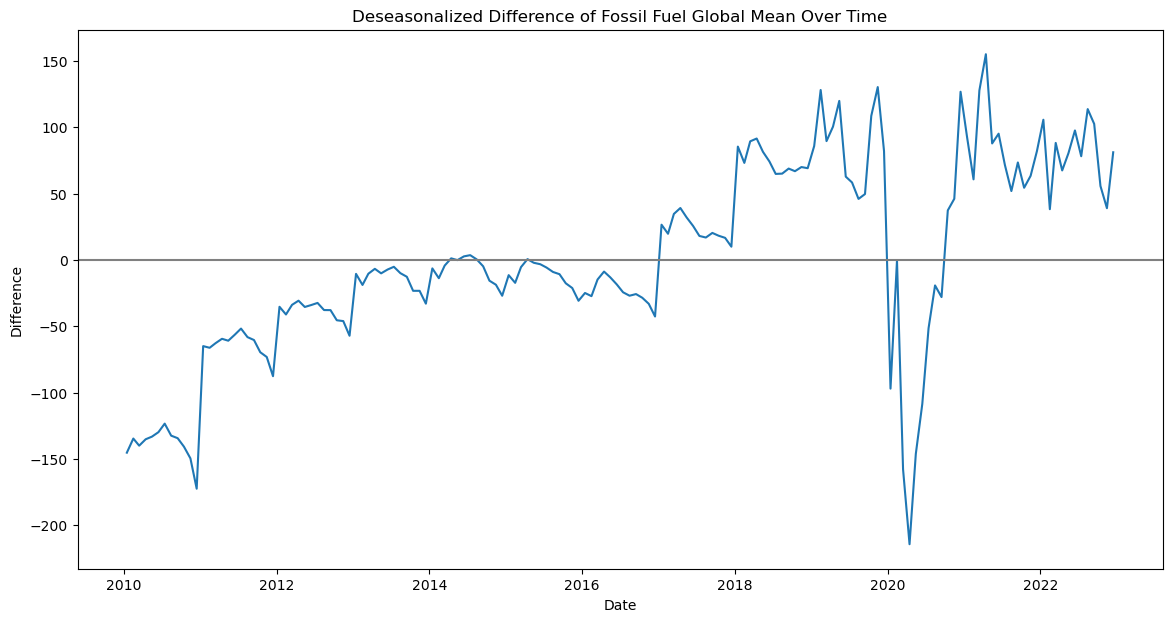

In [504]:
#计算全球的总量
FUEL_global = FUEL_Origin['fossil'].sum(dim=['latitude', 'longitude'])
#FUEL_global.plot(size=7)

#计算月平均值
FUEL_global_clim = FUEL_global.groupby(FUEL_global.time.dt.month).mean()

#转换成df,方便合并算差值
DATE = FUEL_global.time.values
FUEL_global = FUEL_global.values
FUEL_global_df = pd.DataFrame({'DATE': DATE ,'FUEL_global': FUEL_global})
FUEL_global_df['MON'] = FUEL_global_df['DATE'].dt.month
#print(FUEL_global_df)

#转换成df,方便合并算差值
mon = FUEL_global_clim.month.values
fuel_global = FUEL_global_clim.values
FUEL_global_clim_df = pd.DataFrame({'MON': mon,'FUEL_global_clim': fuel_global})
#print(FUEL_global_clim_df)

#合并表格算差值
FUEL_global_merged = pd.merge(FUEL_global_df, FUEL_global_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(FUEL_plot_merged)
FUEL_global_merged['FUEL_global_diff'] = FUEL_global_merged['FUEL_global'] - FUEL_global_merged['FUEL_global_clim']
#print(FUEL_global_merged)

#作图
plt.figure(figsize=(14, 7))
plt.plot(FUEL_global_merged['DATE'], FUEL_global_merged['FUEL_global_diff'], linestyle='-')
plt.title('Deseasonalized Difference of Fossil Fuel Global Mean Over Time')
plt.axhline(y=0, color='grey')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

首先是19年之前比较明显的缓慢上升趋势
然后19年疫情之后人类活动停摆带来的碳排放急剧下降
最后是逐渐恢复到疫情前水平

Text(0.5, 1.0, 'Global Fossil Fuel Carbon Emissions')

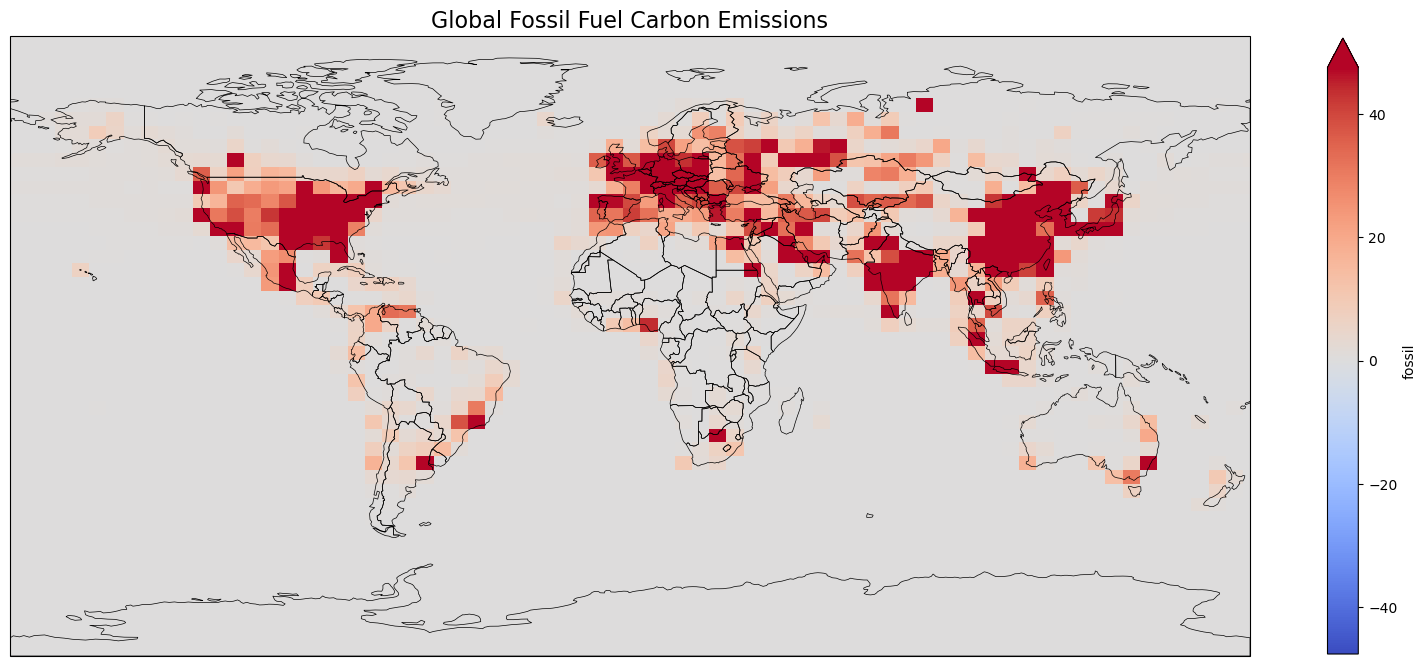

In [524]:
#3.2.1 全球化石燃料碳总排
#计算10年后的总排放
FUEL_sum = FUEL_Origin['fossil'].sum(dim='time')
#print(FUEL_sum)
# Create and define the size of a figure object 
plt.figure(figsize=(20,10), dpi=100)

# Create an axes with Orthographic projection style
#proj = ccrs.Orthographic(central_lon, central_lat) 
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)

# 把总排应用到地图上
FUEL_sum.plot(ax=ax, transform=ccrs.PlateCarree(),
         cmap='coolwarm', vmin=-FUEL_crona.max(), vmax=FUEL_crona.max(), cbar_kwargs={'shrink': 0.8})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

plt.title('Global Fossil Fuel Carbon Emissions', fontsize=16)

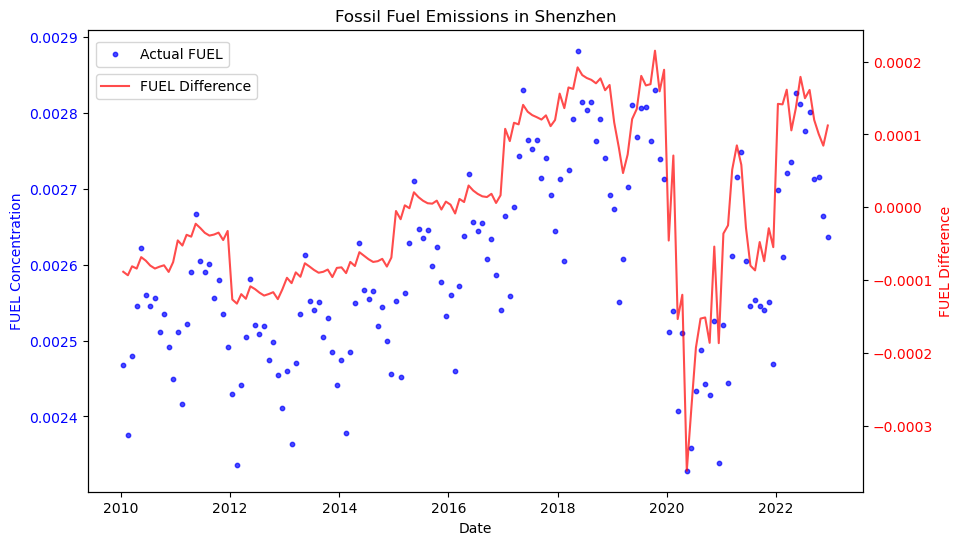

In [490]:
#3.2.2 深圳化石燃料碳排放
#找深圳那个点，算月平均
FUEL_SZ_origin = FUEL_Origin['fossil'].sel(longitude=294.0579, latitude=22.5431, method='nearest')
FUEL_SZ_clim = FUEL_SZ_origin.groupby(FUEL_SZ_origin.time.dt.month).mean()

#转换成df,方便合并算差值
DATE = FUEL_SZ_origin.time.values
FUEL_SZ = FUEL_SZ_origin.values
FUEL_SZ_df = pd.DataFrame({'DATE': DATE ,'FUEL_SZ': FUEL_SZ})
FUEL_SZ_df['MON'] = FUEL_SZ_df['DATE'].dt.month
#print(FUEL_SZ_df)

#转换成df,方便合并算差值
mon = FUEL_SZ_clim.month.values
fuel_SZ = FUEL_SZ_clim.values
FUEL_SZ_clim_df = pd.DataFrame({'MON': mon,'FUEL_SZ_clim': fuel_SZ})
#print(FUEL_SZ_clim_df)

#合并表格算差值
FUEL_SZ_merged = pd.merge(FUEL_SZ_df, FUEL_SZ_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(FUEL_SZ_merged)
FUEL_SZ_merged['FUEL_SZ_diff'] = FUEL_SZ_merged['FUEL_SZ'] - FUEL_SZ_merged['FUEL_SZ_clim']
#print(FUEL_SZ_merged)

# 创建图形
fig, ax1 = plt.subplots(figsize=(10, 6))
# 画实际值的散点图
ax1.scatter(FUEL_SZ_merged['DATE'], FUEL_SZ_merged['FUEL_SZ'], label='Actual FUEL', color='blue', s=10, alpha=0.7)
ax1.set_ylabel('FUEL Concentration', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc=(0.78, 0.92))

#画差值的散点图
ax2 = ax1.twinx()
ax2.plot(FUEL_SZ_merged['DATE'], FUEL_SZ_merged['FUEL_SZ_diff'], label='FUEL Difference', color='red', linestyle='-', alpha=0.7)
ax2.set_ylabel('FUEL Difference', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc=(0.01, 0.85))

#标题、x轴标签
ax1.set_title('Fossil Fuel Emissions in Shenzhen')
ax1.set_xlabel('Date')

# 显示图表
plt.show()

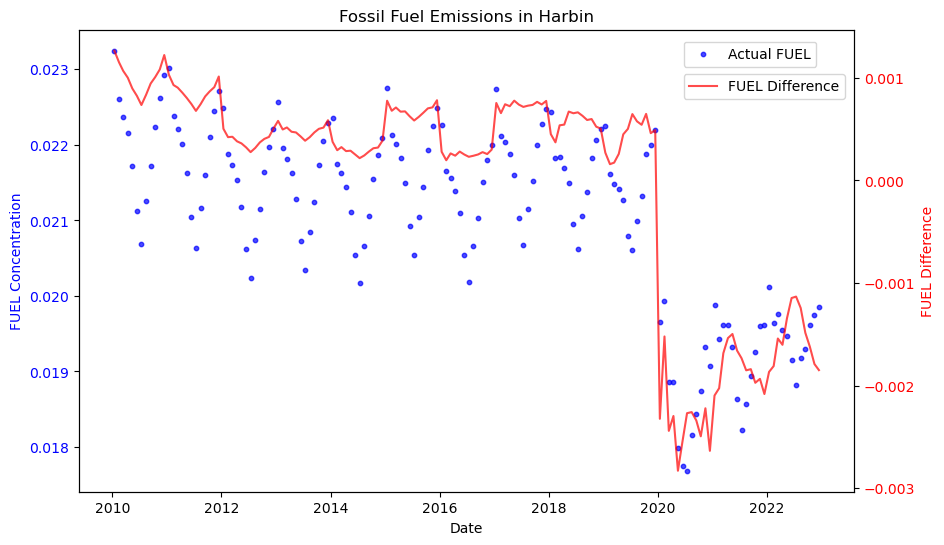

In [526]:
#3.2.3 哈尔滨化石燃料碳排放
#找哈尔滨那个点，算月平均
FUEL_HEB_origin = FUEL_Origin['fossil'].sel(longitude=306.53, latitude=45.75, method='nearest')
FUEL_HEB_clim = FUEL_HEB_origin.groupby(FUEL_HEB_origin.time.dt.month).mean()

#转换成df,方便合并算差值
DATE = FUEL_HEB_origin.time.values
FUEL_HEB = FUEL_HEB_origin.values
FUEL_HEB_df = pd.DataFrame({'DATE': DATE ,'FUEL_HEB': FUEL_HEB})
FUEL_HEB_df['MON'] = FUEL_HEB_df['DATE'].dt.month
#print(FUEL_HEB_df)

#转换成df,方便合并算差值
mon = FUEL_HEB_clim.month.values
fuel_HEB = FUEL_HEB_clim.values
FUEL_HEB_clim_df = pd.DataFrame({'MON': mon,'FUEL_HEB_clim': fuel_HEB})
#print(FUEL_HEB_clim_df)

#合并表格算差值
FUEL_HEB_merged = pd.merge(FUEL_HEB_df, FUEL_HEB_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(FUEL_HEB_merged)
FUEL_HEB_merged['FUEL_HEB_diff'] = FUEL_HEB_merged['FUEL_HEB'] - FUEL_HEB_merged['FUEL_HEB_clim']
#print(FUEL_HEB_merged.head(20))

# 画图（散点、折线）
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(FUEL_HEB_merged['DATE'], FUEL_HEB_merged['FUEL_HEB'], label='Actual FUEL', color='blue', s=10, alpha=0.7)
ax1.set_ylabel('FUEL Concentration', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc=(0.78, 0.92))

ax2 = ax1.twinx()
ax2.plot(FUEL_HEB_merged['DATE'], FUEL_HEB_merged['FUEL_HEB_diff'], label='FUEL Difference', color='red', linestyle='-', alpha=0.7)
ax2.set_ylabel('FUEL Difference', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc=(0.78, 0.85))

ax1.set_title('Fossil Fuel Emissions in Harbin')
ax1.set_xlabel('Date')

plt.show()

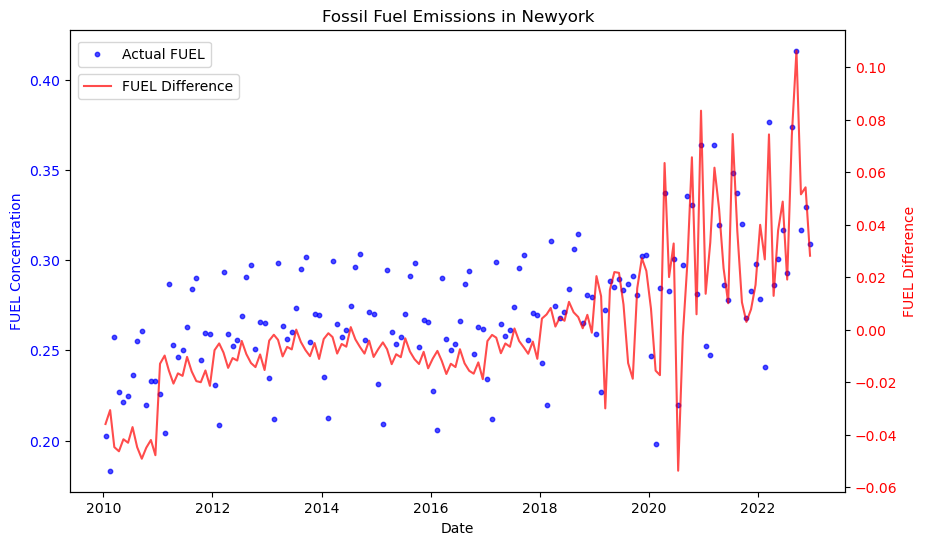

In [538]:
#3.2.4 纽约化石燃料碳排放
#找纽约那个点，算月平均
FUEL_NY_origin = FUEL_Origin['fossil'].sel(longitude=105.9940, latitude=40.7128, method='nearest')
FUEL_NY_clim = FUEL_NY_origin.groupby(FUEL_NY_origin.time.dt.month).mean()

#转换成df,方便合并算差值
DATE = FUEL_NY_origin.time.values
FUEL_NY = FUEL_NY_origin.values
FUEL_NY_df = pd.DataFrame({'DATE': DATE ,'FUEL_NY': FUEL_NY})
FUEL_NY_df['MON'] = FUEL_NY_df['DATE'].dt.month
#print(FUEL_NY_df)

#转换成df,方便合并算差值
mon = FUEL_NY_clim.month.values
fuel_NY = FUEL_NY_clim.values
FUEL_NY_clim_df = pd.DataFrame({'MON': mon,'FUEL_NY_clim': fuel_NY})
#print(FUEL_NY_clim_df)

#合并表格算差值
FUEL_NY_merged = pd.merge(FUEL_NY_df, FUEL_NY_clim_df, on='MON', suffixes=('_origin', '_clim'))
#print(FUEL_NY_merged)
FUEL_NY_merged['FUEL_NY_diff'] = FUEL_NY_merged['FUEL_NY'] - FUEL_NY_merged['FUEL_NY_clim']
#print(FUEL_NY_merged.head(20))

# 画图（散点、折线）
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(FUEL_NY_merged['DATE'], FUEL_NY_merged['FUEL_NY'], label='Actual FUEL', color='blue', s=10, alpha=0.7)
ax1.set_ylabel('FUEL Concentration', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc=(0.01, 0.92))

ax2 = ax1.twinx()
ax2.plot(FUEL_NY_merged['DATE'], FUEL_NY_merged['FUEL_NY_diff'], label='FUEL Difference', color='red', linestyle='-', alpha=0.7)
ax2.set_ylabel('FUEL Difference', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc=(0.01, 0.85))

ax1.set_title('Fossil Fuel Emissions in Newyork')
ax1.set_xlabel('Date')

plt.show()

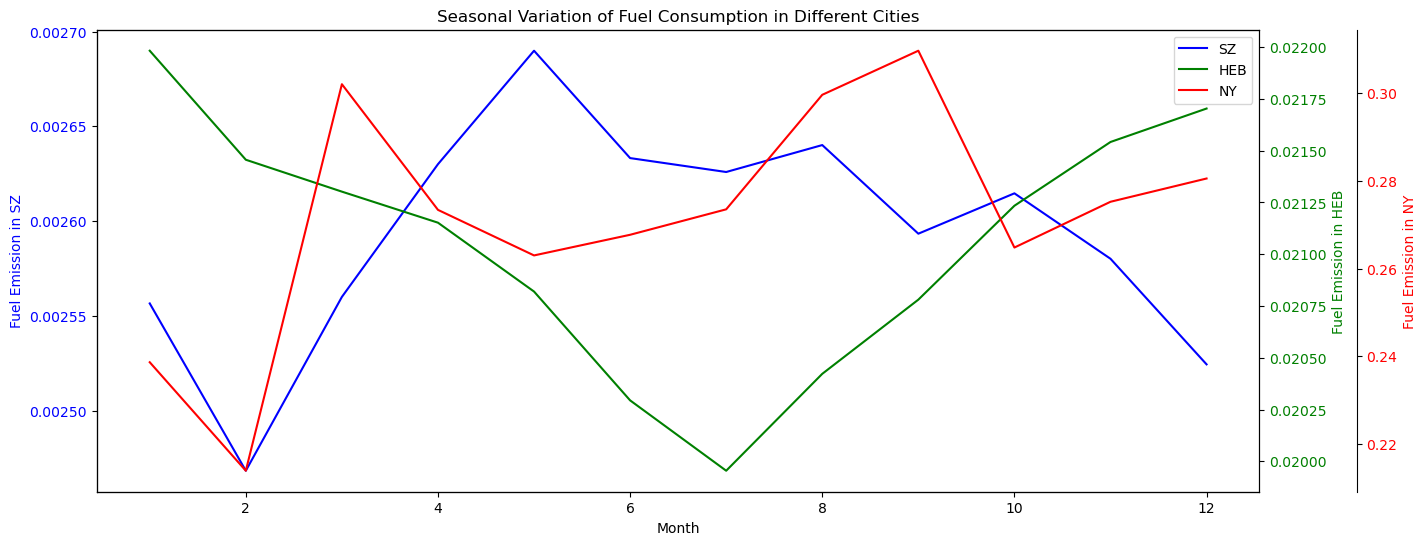

In [536]:
#3.2.5 三个城市的化石燃料碳排放季节差异
#创建图形
fig, ax1 = plt.subplots(figsize=(15, 6))

#深圳的季节变化趋势，第一个y轴
ax1.plot(FUEL_SZ_clim_df['MON'], FUEL_SZ_clim_df['FUEL_SZ_clim'], color='blue', label='SZ')
ax1.set_xlabel('Month')
ax1.set_ylabel('Fuel Emission in SZ', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#哈尔滨的季节变化趋势，第二个y轴，共享同一个x轴
ax2 = ax1.twinx()  
ax2.plot(FUEL_HEB_clim_df['MON'], FUEL_HEB_clim_df['FUEL_HEB_clim'], color='green', label='HEB')
ax2.set_ylabel('Fuel Emission in HEB', color='green')
ax2.tick_params(axis='y', labelcolor='green')

#哈尔滨的季节变化趋势，第三个y轴，共享同一个x轴
ax3 = ax1.twinx()  
ax3.spines['right'].set_position(('outward', 70))  # 将第三个y轴向右移动
ax3.plot(FUEL_BJ_clim_df['MON'], FUEL_NY_clim_df['FUEL_NY_clim'], color='red', label='NY')
ax3.set_ylabel('Fuel Emission in NY', color='red')
ax3.tick_params(axis='y', labelcolor='red')

#图例、标题
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')
plt.title('Seasonal Variation of Fuel Consumption in Different Cities')

plt.show()